In [85]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

In [4]:
#Решите линейную систему
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]], float)
B = np.array([2, 5, 1], float)

print(np.linalg.solve(A, B))

[-0.9        -0.7         1.43333333]


In [13]:
# Найдите псевдорешение
# x + 2y – z = 1
# 3x – 4y = 7
# 8x – 5y + 2z = 12
# 2x – 5z = 7
# 11x +4y – 7z = 15

A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B)

/Users/damuraiz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [58]:
# Сколько решений имеет линейная система:
# Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
C = np.column_stack((A,B))
print('Рассмотрим: \n', C)

rank_A, rank_C = np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)
print(f'Ранг исходной матрицы: {rank_A}, расширенной: {rank_C}')
if rank_A < rank_C:
    print('Исходное СЛАУ решений не имеет!')
#самый простой способ 
B0 = np.array([0, 0, 0])
C0 = np.column_stack((A,B0))
print('Рассмотрим: \n', C0)
rank_C0 = np.linalg.matrix_rank(C0, 0.0001)
print(f'Ранг исходной матрицы: {rank_A}, расширенной: {rank_C0}')
if rank_A==rank_C0:
    print('СЛАУ имеет решения!')
    print('Решение: ', np.linalg.solve(A, B0))

#способ посложнее
BB = np.array([12, 15, 18])
CC = np.column_stack((A,BB))
print('Рассмотрим: \n', CC)
rank_CC = np.linalg.matrix_rank(CC, 0.0001)
print(f'Ранг исходной матрицы: {rank_A}, расширенной: {rank_CC}')
if rank_A==rank_CC:
    print('СЛАУ имеет решения!')
    print('Решение: ', np.linalg.solve(A, BB))




Рассмотрим: 
 [[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]
Ранг исходной матрицы: 2, расширенной: 3
Исходное СЛАУ решений не имеет!
Рассмотрим: 
 [[1 2 3 0]
 [4 5 6 0]
 [7 8 9 0]]
Ранг исходной матрицы: 2, расширенной: 2
СЛАУ имеет решения!
Решение:  [ 0.  0. -0.]
Рассмотрим: 
 [[ 1  2  3 12]
 [ 4  5  6 15]
 [ 7  8  9 18]]
Ранг исходной матрицы: 2, расширенной: 2
СЛАУ имеет решения!
Решение:  [-2.4 -4.2  7.6]


In [78]:
# Вычислите LU-разложение матрицы
A = np.array([[1,2,3],[2,16,21],[4,28,73]])
print(A)
P, L, U = scipy.linalg.lu(A)
print('det(A): ', np.linalg.det(A))
print(P)
print(L)
print(U)
B = np.array([1,7,22])
np.linalg.solve(A, B)

[[ 1  2  3]
 [ 2 16 21]
 [ 4 28 73]]
det(A):  432.00000000000017
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


array([0.03240741, 0.08101852, 0.26851852])

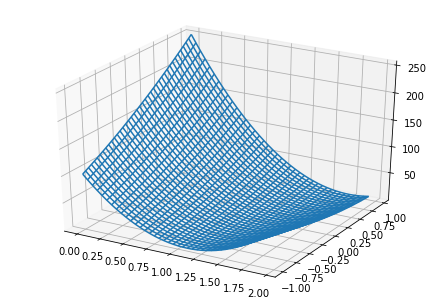

/Users/damuraiz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

In [89]:
#  Найдите нормальное псевдорешение недоопределенной системы:
# x + 2y – z = 1
# 8x – 5y + 2z = 12

# сложим уравнения и выразим z. z = -9x + 3y + 13

def Q(x,y,z):
    return x**2+y**2+z**2

fig = figure()
ax=Axes3D(fig)
X = np.arange(0,2, .05)
Y = np.arange(-1,1, .05)
X, Y = np.meshgrid(X, Y)
ax.plot_wireframe(X, Y, Q(X, Y, -9*X+3*Y+13))
show()

A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])
np.linalg.lstsq(A, B)

In [96]:
A = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)

R1 = R[:2, :2]
B1 = np.dot(np.transpose(Q), B)[:2]
X1 = np.linalg.solve(R1, B1)
X = np.append(X1, 0)
print(X)
#Не успел разобраться как отыскивать нормальное псевдорешение :(

[1.50000000e+00 9.45096256e-15 0.00000000e+00]
